## Часть 1. Гауссовы квадратуры

Метод Гауссовых квадратур является одним из методов численного интегрирования, который позволяет увеличить точность интегрирования, используя ортогональные полиномы и их корни в качестве узлов.

$$
\int_a^b \!  w(x)\, f(x)\, dx \approx \sum_{k=1}^n w_k \, f(x_k) \;,
$$

здесь $\omega$ - функция весов, которая определят базис ортогональных полиномов, чьи корни используются в качестве узлов интегрирования. Если функция $f(x)$ является полиномом, тогда такой метод интегрирования даст *точное* решение интеграла.

Например, давайте посчитаем следующий интеграл:

$$
\int_{-1}^1 (7x^3 - 8 x^2 - 3 x + 3) dx  \label{eq1}\tag{1}
$$

Здесь функция уже полиномиальна, поэтому возьмем весовую функцию $\omega(x) = 1$. Тогда вычисление интеграла сводится к сумме корней полинома, соответствующих весовой функции $\omega(x) = 1$. Например, здесь https://dlmf.nist.gov/18.3 вы можете увидеть, какой базис полиномов соответствует вашей весовой функции.

Заметим, что нашей соответствуют полиномы Лежандра. Теперь, зайдем в документацию https://docs.scipy.org/doc/scipy/reference/special.html#orthogonal-polynomials. Функция *roots_legendre* сразу же выдаст корни полиномов Лежандра, а также веса к их корням (для полиномов Лежандра все эти веса равны единице).

###  Задание 1.1

1. Посчитайте точное значение интеграла ([1](#mjx-eqn-eq1)) "руками". Сравните его с полученным численным значением.

In [9]:
import numpy as np
from scipy.special import roots_legendre

In [7]:
hands = 2 / 3
print(hands)

0.6666666666666666


2. Посчитайте значение интеграла ([1](#mjx-eqn-eq1)), используя обычный метод интегрирования на равномерной сетке (например, написанный вами в week_6_calculus). Оцените количество узлов, необходимых для достижения относительной точности $10^{-10}$.

In [4]:
def simple(x):
    return 7*x**3 - 8*x**2 -3*x +3

def integrate_rectangle(f, a, b, nsteps):
    measure = (b - a) / nsteps
    res = 0.
    for i in range (0, nsteps):
        res += f(a + i*measure + measure/2) * measure
    return res

def midpoint_rule(func, a, b, eps):
    nsteps = 0
    dis = 99999999
    final = 0
    while(dis>eps):
        nsteps+=1
        fir = integrate_rectangle(func, a, b, nsteps)
        sec = integrate_rectangle(func, a, b, 2*nsteps)
        dis = abs(fir-sec)
    final = integrate_rectangle(func, a, b, nsteps)
    return final
a = -1
b = 1
eps=1e-6
print(midpoint_rule(simple, a, b, eps))

0.6666679999999995


Точность взяла 1е-6, так как очень долго считает

3. Посчитайте значение интеграла ([1](#mjx-eqn-eq1)), используя корни полинома Лежандра степени от 1 до 6 в качестве узлов (чтобы получить корни и веса используйте scipy.special.roots_legendre)

In [60]:
def f1(x):
    return 7*x**3-8*x**2-3*x+3

def integral(f, n):
    roots, weights = roots_legendre(n)
    return np.sum(f(roots)*weights)

Сравните количество узлов, необходимых для достижения одинаковой точности в обоих чисенных методах.

(20% итоговой оценки)

In [67]:
def accurancy(f, eps):
    n = 1
    start = hands
    while True:
        n += 1
        end = integral(f, n)
        if abs(start-end)<eps:
            break
        start = end
    return end, n

In [68]:
result = accurancy(f1, 1e-10)
print('result =', result[0], '\nn =', result[1])

result = 0.6666666666666674 
n = 2


###  Задание 1.2

Вычислите значение того же интеграла, но на интервале от 0 до 10.

$$
\int_{0}^{10} (7x^3 - 8 x^2 - 3 x + 3) dx 
$$

Заметим, что больше нельзя использовать полиномы Лежанда, потому что они определены на интервале (-1, 1). Однако всегда можно произвести *аффинное преобразование* (преобразование не меняет область интегрирования) для того, чтобы перейти к желаемой системе координат.

(20% итоговой оценки)

In [81]:
def f2(x):
    return 7*x**3-8*x**2-3*x+3
#Меняем пределы интегрирования на -1, 1
def func(subs, a, b, x):
    return subs(( ( b - a ) / 2 ) * ( x + 1 + 2*a / (b - a) ) ) * ( b - a ) / 2

In [75]:
def integral2(f, n):
    roots, weights = roots_legendre(n)
    return np.sum(func(f,0,10,roots)*weights)

In [76]:
def accurancy2(f, eps):
    n = 1
    start = 44140 / 3
    while True:
        n += 1
        end = integral2(f, n)
        if abs(start-end)<eps:
            break
        start = end
    return end, n

In [78]:
result = accurancy2(f2, 1e-10)
print('result =', result[0], '\nn =', result[1])

result = 14713.333333333336 
n = 2


Сравните результат с точным значением интеграла.

### Задание 1.3

Вычислите значение следующиего интеграла:
$$
\int_{0}^{2\pi} \frac{cos(x) dx }{\sqrt{4\pi^2 - x^2}}
$$
используя соответствующий базис ортогональных полиномов.
Найдите степень полинома (количество узлов), при которой точность превысит ошибку плавающей точки.

(20% итоговой оценки)

Используем полиномы Чебышева (Chebyshev of first kind)

In [80]:
from scipy.special import roots_chebyt

def f3(x):
    return np.cos(2 * np.pi * x) / 2

def integral3(f, n):
    roots, weights = roots_chebyt(n)
    return np.sum(f(roots)*weights)

def accurancy3(f):
    n = 1
    start = 0
    while True:
        n += 1
        end = integral3(f, n)
        if abs(start-end)==0:
            break
        start = end
    return end, n
result = accurancy3(f3)
print('result =', result[0], '\nn =', result[1])

result = 0.34601015881226443 
n = 17


## Часть 2. Уравение Фредгольма

Существует два типа уравнений Фредгольма: 

1. Уравение Фредгольма первого рода:
$$
\int_a^b \! K(x, t)\, \color{blue}{f(t)} \,dt = g(x)
$$

2. Уравнение Фредгольма второго рода:
$$
\lambda \int_a^b\! K(x, t)\, \color{blue}{f(t)} \, dt + g(x) = \color{blue}{f(x)}
$$

Здесь функция $f(x)$ неизвестна, $K(x, t)$ - ядро уравнения, заданная функция $g(x)$ и $\lambda$ - рациональное число.
С точки зрения вычислений, уравение Фредгольма первого рода крайне неустойчиво. Далее мы рассмотрим только уравнение второго рода.

Основная идея - аппроксимировать интеграл некой квадратурной формулой

$$
\int_a^b \! \xi(t)\, dt \approx \sum_j^N w_j\, \xi(t_j)
$$

с подходящими весами $w_j$ и узлами $t_j$, $j=1, \dots, N$. Точность аппроксимации контролируется $N$.

Таким образом, уравнение Фредгольма приближается следующим образом:

$$
\lambda \sum_j w_j\, K(x, t_j)\, \color{blue}{f(t_j)} + g(x) = \color{blue}{f(x)}
$$

Отметим, что $x$ - непрерывная переменная, в то время, как $t$ - дискретная.

Оценивая данное уравнение на сетке $x = t_k$, получаем

$$
\lambda \sum_j w_j \, K_{k, j}\, \color{blue}{f_j} + g_k = \color{blue}{f_k}
$$

где $f_j \equiv f(t_j)$, $g_j \equiv g(t_j)$ and $K_{k, j} \equiv K(t_k, t_j)$. Это ничто иное, как система линейных алгебраических уравнений на вектор $\color{blue}{f_j}$.

Ее решение выдает значение неизвестной функции $f(x)$ в дискретных точках $x=t_j$ для $j=1, \dots, N$.

### Задание 2.1

Решите предложенное уравнение Фредгольма второго рода

$$
f(x) = \sin(\pi x)  + \frac{1}{2} \int_0^1\! f(t) \, dt
$$

Здесь $a, b = 0, 1$, $\lambda = \dfrac{1}{2}$, ядро $K(x, t) = 1$ и правая часть - $g(x) = \sin(\pi x)$.

Точное решение (Сборник задач по интегральным уравнениям, 2006, стр. 5):

$$
f(x) = \sin(\pi x) + \frac{2}{\pi}
$$

Для нахождения интеграла воспользуйтесь Гауссовой квадратурой с весовой функцией $w(x) = 1$ на $(0, 1)$. Посмотрите на http://dlmf.nist.gov/18.3, и найдите соответствующую функцию в *scipy.special* (обратите внимание на область интегрирования).

Сравните полученные значения функции с точным решением для разных значений $N$. На каком $N$ можно остановиться?

(20% итоговой оценки)

In [6]:
import numpy as np
from scipy.special import roots_sh_legendre
import matplotlib.pyplot as plt

error: 0.0000000000


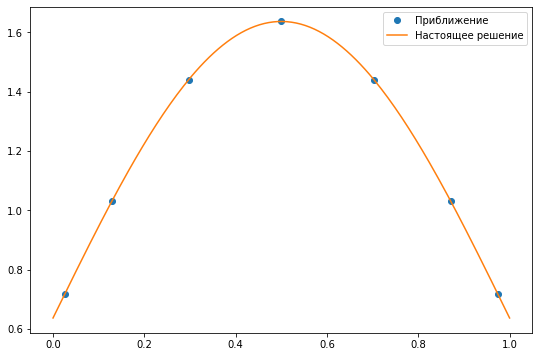

In [27]:
def g(x):
    return np.sin(np.pi * x)
def sol(x):
    return np.sin(np.pi * x) + 2 / np.pi
lam = 1 / 2
N = 1
eps = 1e-10
res = []
err = []
m_nodes = []
while True:
        N+=1
        nodes, weights = roots_sh_legendre(N)
        k = np.empty([N, N])
        k[:] = weights
        a = np.eye(N) - lam * k
        res.append(np.linalg.solve(a, g(nodes)))
        m_nodes.append(nodes)
        err.append(np.linalg.norm(sol(nodes) - res[-1]))
        if err[-1] < eps:
            break
        accuracy = err[-1]
xlim = np.linspace(0, 1, 200)  
plt.figure(figsize=(9,6))
plt.plot(nodes, res[-1], 'o', label='Приближение')
plt.plot(xlim, sol(xlim), '-', label='Настоящее решение')
plt.legend()
print('error: %.10f' % err[-1])

### Задание 2.2

Очевидной проблемой предыдущего результата для $f(x)$ является то, что он возвращает решения на фиксированном наборе точек. Мы не контролируем их точное расположение.

1. Для начала, попробуйте интерполировать значения, полученные в предыдущем пункте на равномерной сетке длиной 50. Можете использовать любой метод интерполяции. Сравните интерполяцию с точным значением.

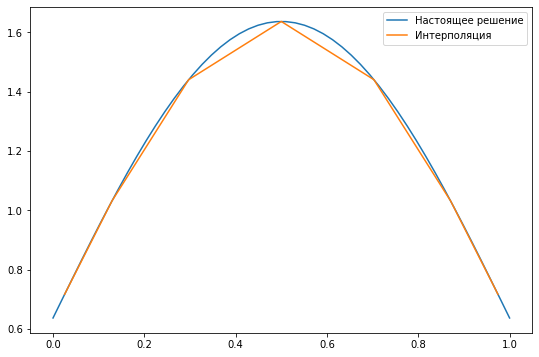

In [33]:
from scipy.interpolate import interp1d
xlim = np.linspace(0, 1, 50)
f = interp1d(nodes, y)
plt.figure(figsize=(9,6))
plt.plot(xlim, sol(xlim) , label='Настоящее решение')
plt.plot(nodes, f(nodes), label='Интерполяция')
plt.legend()

2. Теперь используйте следующую формулу, чтобы вычислить значение функции на той же равномерной сетке.

$$
f(x) = g(x) + \lambda \sum_j^N w_j\, K(x, t_j)\, f(t_j)
$$

Сравните эту интерполяцию с точным значением, а также с прямым интерполяционным методом.

(20% итогой оценки)

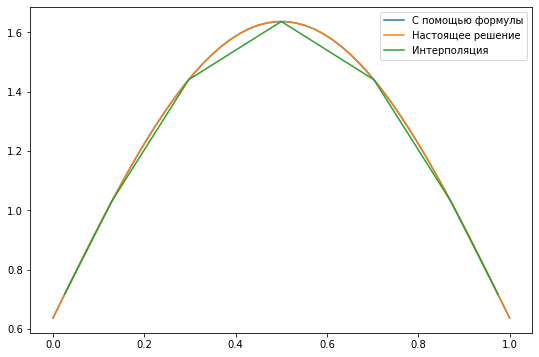

In [37]:
nodes, weights = roots_sh_legendre(N)
def f(x):
    return g(x) + lam * weights @ res[-1]
plt.figure(figsize=(9,6))
plt.plot(xlim, f(xlim), label='С помощью формулы')
plt.plot(xlim, sol(xlim), label='Настоящее решение')
plt.plot(nodes, f(nodes), label='Интерполяция')
plt.legend()